Analysis of a hospital data.

In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import & process csv file and display dataset

read_data=pd.read_csv(r'C:\Users\val-c\Desktop\COURSERA DATASHEET\patients.csv')
read_data

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,status,shipped?,Follow-up Attended?
0,11234,M,Married,Allison,CO,81137,62,Extraction,shipped,yes,Yes
1,15620,F,Single,Allison,CO,81137,94,Extraction,shipped,yes,No
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,shipped,yes,No
3,21829,F,Widowed,Allison,CO,81137,81,Crown,shipped,yes,No
4,21962,F,Single,Allison,CO,81137,45,Extraction,shipped,yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
94,909853,T,Widowed,Allison,CO,81137,78,Extraction,not shipped,no,No
95,915871,F,Partnership,Allison,CO,81137,36,Emergency Surgery,not shipped,no,Yes
96,923490,M,Single,Allison,CO,81137,38,Extraction,not shipped,no,Yes
97,934101,F,Single,Allison,CO,81137,39,Emergency Surgery,not shipped,no,Yes


In [3]:
#Rename columns [Follow-up Attended?,shipped?] to remove the question mark (?)

read_data.rename(columns = {'Follow-up Attended?':'Follow-up Attended','shipped?':'shipped'},
                 inplace = True)
#print corrected columns with the rest
read_data.columns

Index(['Patient ID', 'Gender', 'Marital Status', 'City', 'State', 'Zip Code',
       'Age', 'Procedure', 'status', 'shipped', 'Follow-up Attended'],
      dtype='object')

In [4]:
#display the information and data types of the dataframe

typ,info=read_data.dtypes, read_data.info()
print (typ,info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient ID          99 non-null     int64 
 1   Gender              99 non-null     object
 2   Marital Status      99 non-null     object
 3   City                99 non-null     object
 4   State               99 non-null     object
 5   Zip Code            99 non-null     int64 
 6   Age                 99 non-null     int64 
 7   Procedure           99 non-null     object
 8   status              99 non-null     object
 9   shipped             99 non-null     object
 10  Follow-up Attended  99 non-null     object
dtypes: int64(3), object(8)
memory usage: 8.6+ KB
Patient ID             int64
Gender                object
Marital Status        object
City                  object
State                 object
Zip Code               int64
Age                    int64
Procedure           

In [5]:
#find duplicates?

read_data.duplicated().value_counts()

False    99
dtype: int64

In [6]:
#finding missing values in the datasets

read_data.isna().sum().to_frame('Total')

,Total
Patient ID,0
Gender,0
Marital Status,0
City,0
State,0
Zip Code,0
Age,0
Procedure,0
status,0
shipped,0


In [7]:
#display the statistics of the dataframe

read_data.describe()

,Patient ID,Zip Code,Age
count,99.000000,99.0,99.000000
mean,297007.989899,81137.0,62.818182
std,304907.283539,0.0,21.413025
min,11234.000000,81137.0,24.000000
25%,52802.000000,81137.0,43.000000
50%,98812.000000,81137.0,68.000000
75%,534712.500000,81137.0,81.000000
max,936597.000000,81137.0,102.000000


In [8]:
# process & display the following columns('Patient ID' ,'Gender','Marital Status','Age','Procedure') for analysis

select_coln=read_data[['Patient ID' ,'Gender','Marital Status','Age','Procedure','Follow-up Attended']]

select_coln.head(9)


,Patient ID,Gender,Marital Status,Age,Procedure,Follow-up Attended
0,11234,M,Married,62,Extraction,Yes
1,15620,F,Single,94,Extraction,No
2,19622,M,Divorced,90,Extraction,No
3,21829,F,Widowed,81,Crown,No
4,21962,F,Single,45,Extraction,Yes
5,26513,F,Partnership,43,Emergency Surgery,Yes
6,29489,M,Married,85,Crown,No
7,34918,T,Widowed,81,Extraction,No
8,34952,F,Single,35,Implant,Yes


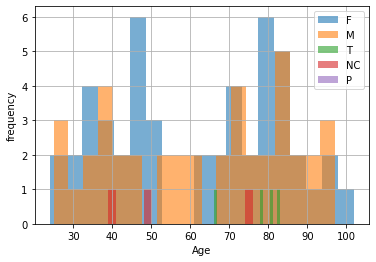

In [9]:
#get the subsets of the genders and their age distribution by a histogram?

read_data[read_data['Gender']=='F']['Age'].hist(alpha=0.6,bins=19)
read_data[read_data['Gender']=='M']['Age'].hist(alpha=0.6,bins=19)

read_data[read_data['Gender']=='T']['Age'].hist(alpha=0.6,bins=20)
read_data[read_data['Gender']=='NC']['Age'].hist(alpha=0.6,bins=20)
read_data[read_data['Gender']=='P']['Age'].hist(alpha=0.6,bins=20)

plt.legend(['F','M','T','NC','P']) 
 #title for x-axis
plt.xlabel('Age')
 #title for y-axis
plt.ylabel('frequency')

#display hist()
plt.show()

In [10]:
#determine the different procedures exisiting in the dataframe?

read_data['Procedure'].unique()

array(['Extraction', 'Crown', 'Emergency Surgery', 'Implant', 'Veneers'],
      dtype=object)

In [11]:
#get the number of patients who either attendeded the follow up or not, groupby their procedures

follow_up=read_data.groupby ('Procedure')['Follow-up Attended'].value_counts()
#print()
follow_up.to_frame()

Follow-up Attended
Procedure         Follow-up Attended                    
Crown             No                                  12
                  Yes                                 10
Emergency Surgery Yes                                  6
                  No                                   4
Extraction        Yes                                 27
                  No                                  26
Implant           Yes                                  8
                  No                                   5
Veneers           Yes                                  1

In [12]:
#group the patients by their IDs and the medical procedures undertaken, who either attendeded the follow up or not?

folow_up_id=read_data.groupby (['Patient ID','Procedure'])['Follow-up Attended'].sum()
#display first-twenty rows
folow_up_id.head(20)

Patient ID  Procedure        
11234       Extraction           Yes
15620       Extraction            No
19622       Extraction            No
21829       Crown                 No
21962       Extraction           Yes
26513       Emergency Surgery    Yes
29489       Crown                 No
34918       Extraction            No
34952       Implant              Yes
35329       Emergency Surgery     No
39606       Extraction            No
40614       Crown                 No
41371       Crown                 No
42305       Crown                Yes
43854       Emergency Surgery    Yes
43891       Extraction            No
44606       Crown                 No
46218       Extraction           Yes
47060       Crown                 No
47587       Emergency Surgery     No
Name: Follow-up Attended, dtype: object

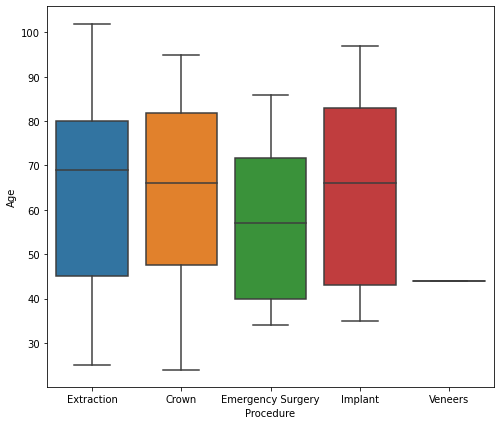

In [13]:
#compute the statistics of the ages that underwent different medical procedures with a boxplot

plt.figure(figsize=(8,7)) 
sns.boxplot(y='Age', x='Procedure',data=read_data,) 
#displaying figure
plt.show()

In [ ]:
#get the different genders in the gender column?

read_data['Gender'].unique()

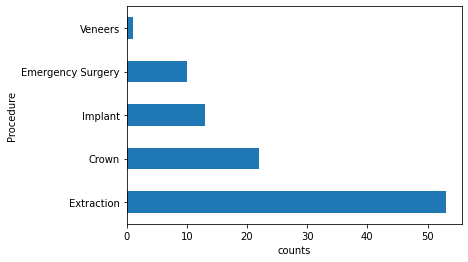

In [14]:
#get the number of the various procedures underwent by the patients with a bar chart

read_data.value_counts('Procedure').plot.barh()
plt.xlabel('counts')
plt.show()

In [ ]:
#count the number of different values in the marital status, and plot the barchart?

read_data['Marital Status'].value_counts().to_frame()

In [ ]:
read_data['Marital Status'].value_counts().plot.barh(color='olive',figsize=(6,5))

plt.xlabel('counts')
plt.ylabel('Marital Status')
plt.show()

In [15]:
# get the list of the single females who underwent the different surgical procedures?

singl_feml=read_data[
            (read_data['Gender']=='F') & (read_data['Marital Status']=='Single')
            ].sort_values('Patient ID',ascending=True)

singl_feml

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,status,shipped,Follow-up Attended
1,15620,F,Single,Allison,CO,81137,94,Extraction,shipped,yes,No
4,21962,F,Single,Allison,CO,81137,45,Extraction,shipped,yes,Yes
8,34952,F,Single,Allison,CO,81137,35,Implant,shipped,yes,Yes
39,75025,F,Single,Southern Ute,CO,81137,30,Crown,not shipped,no,No
58,241715,F,Single,Southern Ute,CO,81137,52,Extraction,not shipped,no,Yes
64,386755,F,Single,Southern Ute,CO,81137,63,Extraction,not shipped,no,Yes
97,934101,F,Single,Allison,CO,81137,39,Emergency Surgery,not shipped,no,Yes


In [16]:
# a pivot table to summarize the patients by their IDs, who attended the follow-up or not after the medical procedure?

procu_gend_=read_data.pivot_table(values='Follow-up Attended',columns='Procedure', index='Patient ID',aggfunc=sum)
procu_gend_

Procedure,Crown,Emergency Surgery,Extraction,Implant,Veneers
Patient ID,,,,,
11234,NaN,NaN,Yes,NaN,NaN
15620,NaN,NaN,No,NaN,NaN
19622,NaN,NaN,No,NaN,NaN
21829,No,NaN,NaN,NaN,NaN
21962,NaN,NaN,Yes,NaN,NaN
...,...,...,...,...,...
909853,NaN,NaN,No,NaN,NaN
915871,NaN,Yes,NaN,NaN,NaN
923490,NaN,NaN,Yes,NaN,NaN


In [17]:
#save cleaned dataset
read_data.to_csv('patient_cleaned_data.csv')